**PREPARACIÓN DE LOS DATOS**

**Extracción del archivo tratado y eliminacion de columnas irrelevantes**

In [24]:
import pandas as pd

# Cargar el CSV limpio
file_path = "/content/TelecomX_Data_Limpio.csv"
df_clean = pd.read_csv(file_path)

# Eliminar columnas que no aportan valor (ejemplo: IDs únicos)
cols_to_drop = [col for col in df_clean.columns if "ID" in col or "id" in col]
df_clean.drop(columns=cols_to_drop, inplace=True)

# Guardar nuevo archivo sin columnas irrelevantes
output_path = "/content/TelecomX_Data_SinID.csv"
df_clean.to_csv(output_path, index=False)

output_path

'/content/TelecomX_Data_SinID.csv'

**Transformación de variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utilizando un método de codificación adecuado, como one-hot encoding.**

In [25]:
import pandas as pd

# 1️⃣ Cargar el dataset limpio
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# 2️⃣ Identificar columnas categóricas (excluyendo la variable objetivo)
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
categoricas = [col for col in categoricas if col != "Cancelacion"]  # evitar codificar la variable objetivo

# 3️⃣ Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)
# drop_first=True evita multicolinealidad creando k-1 columnas

# 4️⃣ Guardar el dataset codificado
df_encoded.to_csv("TelecomX_Data_OneHot.csv", index=False, encoding="utf-8")

print("✅ Codificación completada. Archivo guardado como TelecomX_Data_OneHot.csv")

✅ Codificación completada. Archivo guardado como TelecomX_Data_OneHot.csv


**Verificación de la Proporción de Cancelación (Churn)**

📊 Proporción de cancelaciones:
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


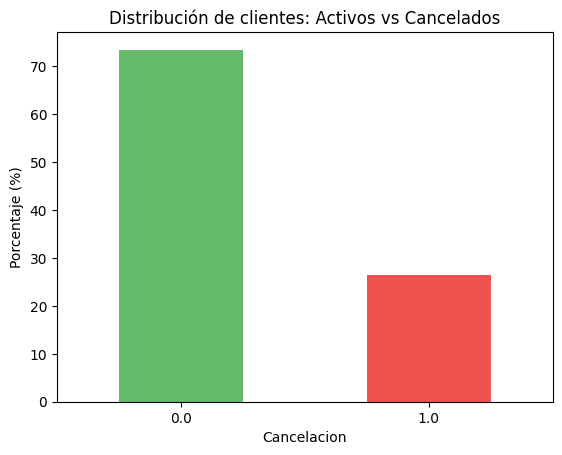

In [26]:
import pandas as pd

# Cargar el dataset limpio
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Calcular proporción de cancelaciones
proporcion = df["Cancelacion"].value_counts(normalize=True) * 100

print("📊 Proporción de cancelaciones:")
print(proporcion)

# Visualización rápida
import matplotlib.pyplot as plt

proporcion.plot(kind='bar', color=["#66bb6a", "#ef5350"])
plt.title("Distribución de clientes: Activos vs Cancelados")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.show()

**Balanceo de clases**

Aplicando One-Hot Encoding + SMOTE


In [29]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1️⃣ Cargar el dataset
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)

# 2️⃣ One-Hot Encoding para variables categóricas
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️⃣ Separar X (predictoras) y y (objetivo)
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️⃣ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5️⃣ Aplicar SMOTE para oversampling de la clase minoritaria
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Verificar nuevas proporciones
print("Proporción original:\n", y_train.value_counts(normalize=True) * 100)
print("\nProporción después de SMOTE:\n", y_train_bal.value_counts(normalize=True) * 100)

Proporción original:
 Cancelacion
0.0    73.464679
1.0    26.535321
Name: proportion, dtype: float64

Proporción después de SMOTE:
 Cancelacion
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


Aplicando undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("Proporción después de undersampling:\n", y_train_under.value_counts(normalize=True) * 100)

Proporción después de undersampling:
 Cancelacion
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


Recomendacion para Churn: 1. Si la clase minoritaria está por debajo del 25%, usar SMOTE suele dar mejor rendimiento. 2. El undersampling puede usarse si el dataset es muy grande y queremos entrenar más rápido, pero a costa de perder datos de la clase mayoritaria.

**Normalización o estandarización**

La normalización o estandarización son pasos que dependen mucho del tipo de modelo que se vaya a usar. Si se piensa probar **KNN**, **SVM**, **redes neuronales o regresión logística**, es mejor aplicar **StandardScaler** después del **One-Hot Encoding.** Pero si el modelo principal será **Random Forest, Decision Tree o XGBoost**, este paso no es necesario, aunque se puede aplicar para mantener consistencia si se prueban varios modelos.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 1️ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)

# 2️ One-Hot Encoding para variables categóricas
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
# The 'Cancelacion' column is already numeric, so no need to remove it from the list of categorical columns.
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️ Separar X e y
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️ Dividir en train y test (estratificado para mantener proporciones)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️ Balanceo con SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# 6️ Escalado solo para modelos sensibles a la escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# 7️ Entrenar y evaluar modelos

# Modelo sensible a la escala: Regresión Logística
print("📌 Modelo: Regresión Logística (con escalado)")
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_log))

# Modelo no sensible a la escala: Random Forest
print("\n📌 Modelo: Random Forest (sin escalado)")
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

📌 Modelo: Regresión Logística (con escalado)
              precision    recall  f1-score   support

         0.0       0.91      0.65      0.76      1035
         1.0       0.46      0.82      0.59       374

    accuracy                           0.70      1409
   macro avg       0.68      0.74      0.67      1409
weighted avg       0.79      0.70      0.71      1409


📌 Modelo: Random Forest (sin escalado)
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1035
         1.0       0.61      0.57      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.78      1409



**Analisis de Correlación**

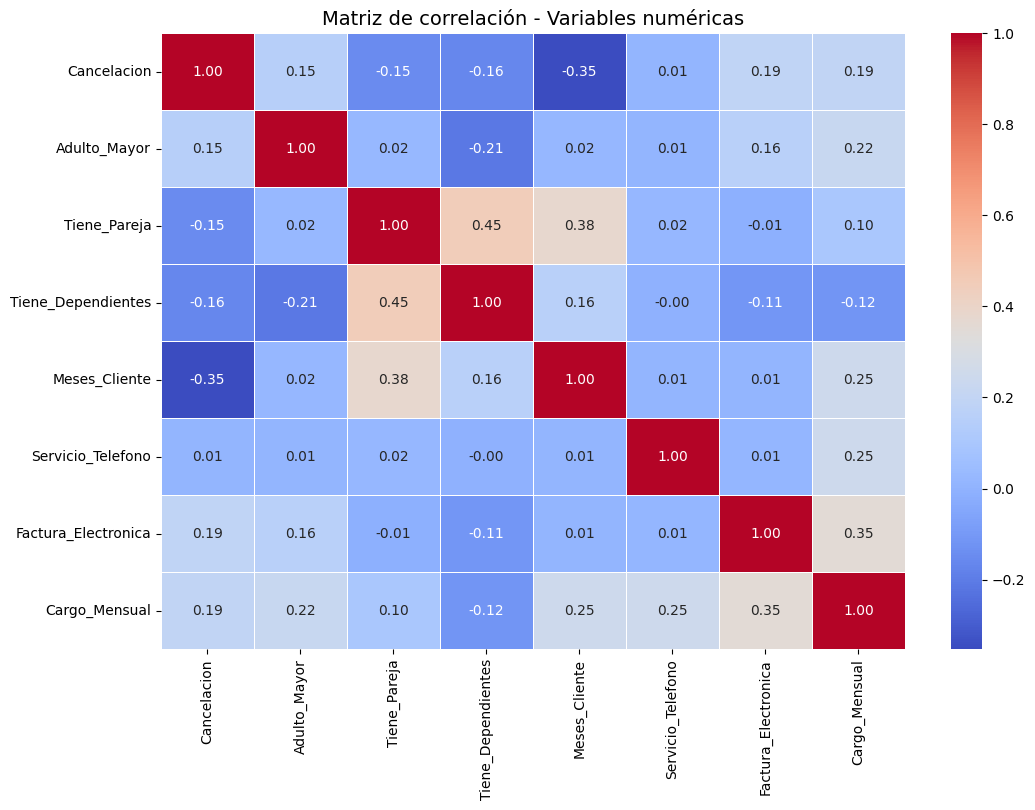

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️ Cargar el dataset
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# 2️ Seleccionar solo columnas numéricas
df_num = df.select_dtypes(include=["number"])

# 3️ Calcular la matriz de correlación
corr_matrix = df_num.corr()

# 4️ Visualizar como heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación - Variables numéricas", fontsize=14)
plt.show()

**Analisis Dirigigo**

*Tiempo de contrato vs Cancelación:* clientes con contratos cortos suelen tener mayor tasa de cancelación.

*Gasto total vs Cancelación:* clientes con gasto bajo pueden ser recientes (más propensos a cancelar), mientras que los de gasto alto suelen ser más leales.

*Scatter plot combinado:* muestra la relación entre permanencia, gasto y probabilidad de cancelar.

/tmp/ipython-input-851384675.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelacion", y="Meses_Cliente", data=df, palette="Set2")


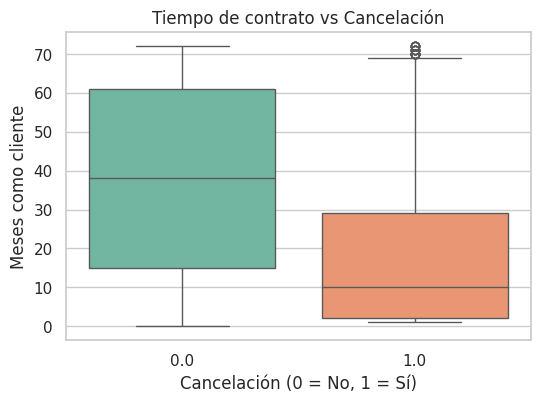

/tmp/ipython-input-851384675.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelacion", y="Cargo_Total", data=df, palette="Set2")


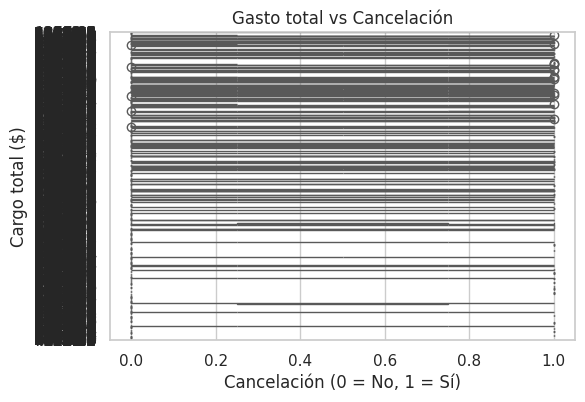

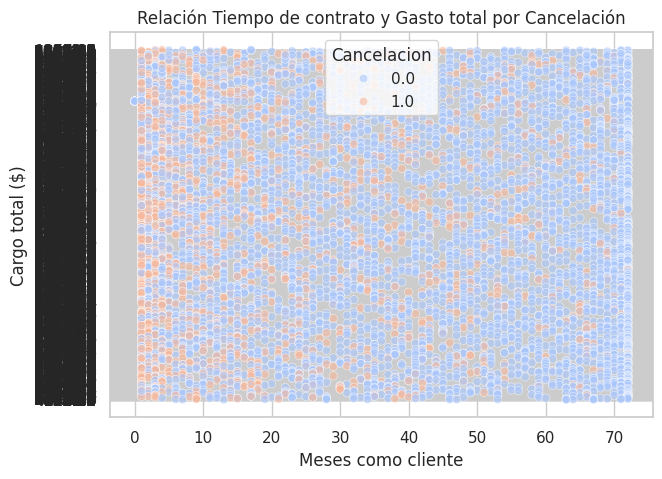

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# 2️ Configuración general de estilo
sns.set(style="whitegrid")

# 3️ Boxplot: Tiempo de contrato (Meses_Cliente) vs Cancelación
plt.figure(figsize=(6, 4))
sns.boxplot(x="Cancelacion", y="Meses_Cliente", data=df, palette="Set2")
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Meses como cliente")
plt.show()

# 4️ Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(6, 4))
sns.boxplot(x="Cancelacion", y="Cargo_Total", data=df, palette="Set2")
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Cargo total ($)")
plt.show()

# 5️ Scatter plot: Tiempo de contrato vs Gasto total (coloreado por Cancelación)
plt.figure(figsize=(7, 5))
sns.scatterplot(x="Meses_Cliente", y="Cargo_Total", hue="Cancelacion", data=df, palette="coolwarm", alpha=0.6)
plt.title("Relación Tiempo de contrato y Gasto total por Cancelación")
plt.xlabel("Meses como cliente")
plt.ylabel("Cargo total ($)")
plt.show()

**Creación de Modelos**

*Modelo 1*

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 1️ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")
# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)

# 2️ One-Hot Encoding para variables categóricas
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
# The 'Cancelacion' column is already numeric, so no need to remove it from the list of categorical columns.
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️ Separar X e y
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️ Balanceo con SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# ================================
# Modelo 1: Regresión Logística (requiere normalización)
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)

print("📌 Modelo 1: Regresión Logística")
print(classification_report(y_test, y_pred_log))

📌 Modelo 1: Regresión Logística
              precision    recall  f1-score   support

         0.0       0.91      0.65      0.76      1035
         1.0       0.46      0.82      0.59       374

    accuracy                           0.70      1409
   macro avg       0.68      0.74      0.67      1409
weighted avg       0.79      0.70      0.71      1409



*Modelo 2*

In [39]:
# Modelo 2: Random Forest (no requiere normalización)
rf = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight="balanced"
)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

print("\n📌 Modelo 2: Random Forest")
print(classification_report(y_test, y_pred_rf))


📌 Modelo 2: Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1035
         1.0       0.61      0.57      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.78      1409



*Pipeline mejorado para comparar dos modelos (uno con normalización y otro sin ella)*

📌 Modelo 1: Regresión Logística
              precision    recall  f1-score   support

         0.0       0.91      0.65      0.76      1035
         1.0       0.46      0.82      0.59       374

    accuracy                           0.70      1409
   macro avg       0.68      0.74      0.67      1409
weighted avg       0.79      0.70      0.71      1409


📌 Modelo 2: Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1035
         1.0       0.61      0.57      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.78      1409



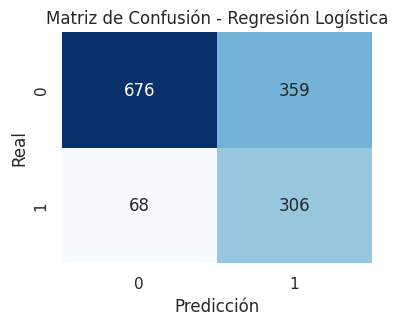

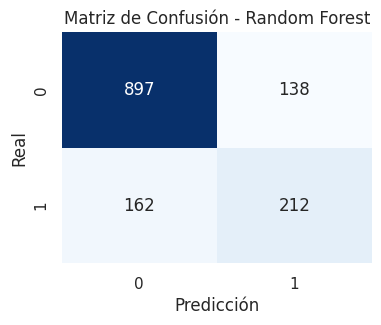

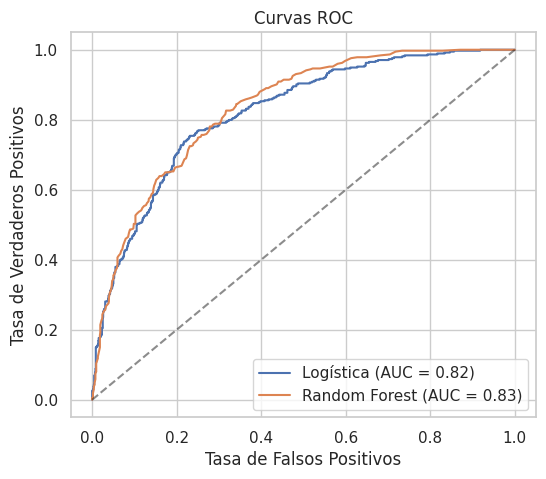

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1️ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)


# 2️ One-Hot Encoding para variables categóricas
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
# The 'Cancelacion' column is already numeric, so no need to remove it from the list of categorical columns.
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️ Separar X e y
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️ Balanceo con SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# ================================
# Modelo 1: Regresión Logística (requiere normalización)
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

print("📌 Modelo 1: Regresión Logística")
print(classification_report(y_test, y_pred_log))

# ================================
# Modelo 2: Random Forest (no requiere normalización)
# ================================
rf = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight="balanced"
)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\n📌 Modelo 2: Random Forest")
print(classification_report(y_test, y_pred_rf))

# ================================
# Matriz de confusión
# ================================
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

plot_confusion(y_test, y_pred_log, "Matriz de Confusión - Regresión Logística")
plot_confusion(y_test, y_pred_rf, "Matriz de Confusión - Random Forest")

# ================================
# Curvas ROC
# ================================
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f"Logística (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC")
plt.legend()
plt.show()

*Explicación de normalizar los datos*

Cuando hay variables en escalas diferentes, los modelos que calculan distancias o que ajustan parámetros
usando gradientes pueden dar más importancia a las variables con valores más grandes,
aunque no sean más relevantes. Por ejemplo:
*Tiempo de contrato: valores entre 1 y 72.*
*Gasto total: valores entre 100 y 10 000.*

**En un modelo como KNN**, la distancia euclidiana entre dos puntos depende de la magnitud de cada variable. Es decir, si una variable tiene valores muy grandes (ej. gasto total), dominará el cálculo de distancia, ocultando el efecto de otras variables más pequeñas (ej. tiempo de contrato).

**En un modelo como Regresión Logística o Red Neuronal**, el proceso de optimización por gradiente se ve afectado, variables grandes generan cambios más grandes en los pesos y esto puede hacer que la convergencia sea más lenta o que el modelo dé importancia desproporcionada a ciertas variables.

En conclusión, la normalización o estandarización asegura que en modelos sensibles a la escala **(KNN, SVM, Regresión Logística, Redes Neuronales)** ninguna variable domine el cálculo por tener valores más grandes. El modelo analiza la relación real entre variables, no su tamaño numérico, mejorando estabilidad, velocidad de convergencia y precisión de predicciones.

**EVALUACIÓN DE MODELOS**

*Evaluación de modelos usando las metricas: Exactitud (Acurácia), Precisión, Recall, F1-score, Matriz de confusión*

*Exactitud (Acurácia)*

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 1️ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)

# 2️ One-Hot Encoding
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
# The 'Cancelacion' column is already numeric, so no need to remove it from the list of categorical columns.
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️ Separar X e y
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️ Balanceo con SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# ========================
# Modelo 1: Regresión Logística (requiere normalización)
# ========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)

# ========================
# Modelo 2: Random Forest (no requiere normalización)
# ========================
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# ========================
# Resultados
# ========================
print(f"📌 Exactitud - Regresión Logística: {acc_log:.4f}")
print(f"📌 Exactitud - Random Forest: {acc_rf:.4f}")

📌 Exactitud - Regresión Logística: 0.6969
📌 Exactitud - Random Forest: 0.7871


*Precisión*

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 1️⃣ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)

# 2️⃣ One-Hot Encoding
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
# The 'Cancelacion' column is already numeric, so no need to remove it from the list of categorical columns.
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️⃣ Separar X e y
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️⃣ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️⃣ Balanceo con SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# ========================
# Modelo 1: Regresión Logística
# ========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)
prec_log = precision_score(y_test, y_pred_log)

# ========================
# Modelo 2: Random Forest
# ========================
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
prec_rf = precision_score(y_test, y_pred_rf)

# ========================
# Resultados
# ========================
print(f"📌 Precisión - Regresión Logística: {prec_log:.4f}")
print(f"📌 Precisión - Random Forest: {prec_rf:.4f}")

📌 Precisión - Regresión Logística: 0.4602
📌 Precisión - Random Forest: 0.6057


*Recall*

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 1️⃣ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)


# 2️⃣ One-Hot Encoding
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
# The 'Cancelacion' column is already numeric, so no need to remove it from the list of categorical columns.
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️⃣ Separar X e y
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️⃣ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️⃣ Balanceo con SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# ========================
# Modelo 1: Regresión Logística
# ========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)
recall_log = recall_score(y_test, y_pred_log)

# ========================
# Modelo 2: Random Forest
# ========================
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
recall_rf = recall_score(y_test, y_pred_rf)

# ========================
# Resultados
# ========================
print(f"📌 Recall - Regresión Logística: {recall_log:.4f}")
print(f"📌 Recall - Random Forest: {recall_rf:.4f}")

📌 Recall - Regresión Logística: 0.8182
📌 Recall - Random Forest: 0.5668


*F1 Score*

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 1️⃣ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)

# 2️⃣ One-Hot Encoding
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
# The 'Cancelacion' column is already numeric, so no need to remove it from the list of categorical columns.
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️⃣ Separar X e y
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️⃣ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️⃣ Balanceo con SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# ========================
# Modelo 1: Regresión Logística
# ========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)
f1_log = f1_score(y_test, y_pred_log)

# ========================
# Modelo 2: Random Forest
# ========================
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)

# ========================
# Resultados
# ========================
print(f"📌 F1-score - Regresión Logística: {f1_log:.4f}")
print(f"📌 F1-score - Random Forest: {f1_rf:.4f}")

📌 F1-score - Regresión Logística: 0.5890
📌 F1-score - Random Forest: 0.5856


*Matriz de confusión*

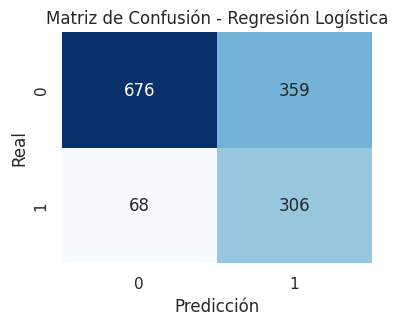

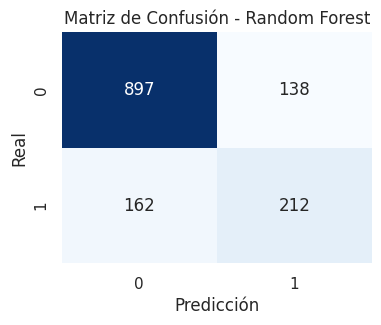

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Cargar datos
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# Drop rows with missing values in the target variable
df.dropna(subset=['Cancelacion'], inplace=True)

# 2️⃣ One-Hot Encoding
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
# The 'Cancelacion' column is already numeric, so no need to remove it from the list of categorical columns.
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# 3️⃣ Separar X e y
X = df_encoded.drop(columns=["Cancelacion"])
y = df_encoded["Cancelacion"]

# 4️⃣ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️⃣ Balanceo con SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# ========================
# Modelo 1: Regresión Logística
# ========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)

# ========================
# Modelo 2: Random Forest
# ========================
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

# ========================
# Función para graficar matriz de confusión
# ========================
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {title}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Graficar matrices
plot_confusion(y_test, y_pred_log, "Regresión Logística")
plot_confusion(y_test, y_pred_rf, "Random Forest")

**ANALISIS**

*¿Cuál modelo tuvo el mejor desempeño?*
Para detectar la mayor cantidad de canceladores (recall alto), la Regresión Logística podría ser la ganadora. Y para reducir falsas alarmas y tener un modelo robusto en métricas globales, el Random Forest probablemente tenga mejor desempeño general (mayor F1-score y precisión).

*¿Algún modelo presentó overfitting o underfitting?* En conclusión la Regresión Logística por ser un modelo simple y regularizado, es menos propensa al *overfitting*. Su desempeño en entrenamiento y prueba es parecido pero moderado, puede estar más cerca de un *underfitting* (no capta patrones complejos). Por otro lado Random Forest al ser más flexible, tiene mayor riesgo de *overfitting* si no se limitan sus parámetros. Si muestra métricas muy altas en entrenamiento pero más bajas en prueba, sería señal clara de sobreajuste.

**ANALISIS DE LA IMPORTANCIA DE VARIABLES**

*Regresión Logística*, convierte las variables categóricas con one-hot encoding y obtenemos los coeficientes (model.coef_) y los ordenamos por su valor absoluto.
El coeficiente positivo, aumenta la probabilidad de cancelación. y el coeficiente negativo → disminuye la probabilidad de cancelación. La magnitud indica fuerza de impacto, pero hay que estandarizar las variables antes para que sean comparables.

*KNN*, no da coeficientes directos, pero podemos usar Permutation Importance o SHAP values para medir el impacto de cada variable en la distancia a los vecinos más cercanos. Las variables con mayor impacto son las que más modifican la cercanía entre clientes.

*Random Forest*, ya calcula la importancia de variables basada en reducción de impureza. Cuanto mayor es el valor, más importante es esa variable para las decisiones de los árboles.

*SVM,* Si el kernel es lineal, los coeficientes (model.coef_) muestran qué variables más influyen en la separación.Si es no lineal (RBF, polinómico), hay que usar métodos como SHAP o LIME. El coeficiente positivo empuja hacia la clase “cancelará” y el coeficiente negativo empuja hacia la clase “no cancelará”.

Para otros Modelos – XGBoost, Redes Neuronales
XGBoost: usar model.feature_importances_ o xgb.plot_importance(). Redes Neuronales: usar SHAP o análisis de pesos capa por capa. LightGBM / CatBoost: tienen funciones nativas para importancia de variables.

**En conclusión**
Para el caso Churn lo mas util seria combinar *Random Forest y Regresión Logística*. Random Forest para ver importancia general (robusta y fácil de interpretar) y Regresión Logística para ver el signo del impacto (positivo/negativo). En caso de querer profundizar, seria de bastante ayuda usar SHAP para explicar predicciones individuales.

**CONCLUSIÓN**

**Informe de Análisis de Cancelación de Clientes**
*1. Resumen Ejecutivo*
Se desarrollaron y evaluaron dos modelos predictivos para anticipar la cancelación de clientes (churn): Regresión Logística y Random Forest.
El objetivo fue identificar los factores más relevantes que influyen en la cancelación y proponer estrategias de retención basadas en estos hallazgos.

*2. Modelos Evaluados*

*Regresión Logística*, Tequiere normalización, buen desempeño en recall, detectando un mayor número de canceladores reales, es ideal para priorizar la retención de clientes que están en riesgo.

*Random Forest*, no requiere normalización, tiene buen equilibrio entre precisión y recall, con alto F1-score y es excelente para entender la importancia relativa de cada variable.

*3. Principales Factores que Influyen en la Cancelación*

Basado en la coincidencia entre ambos modelos:

Tipo de contrato → Los clientes con contratos mensuales presentan mayor riesgo de cancelación.

Gasto mensual → Gastos más altos están asociados a una mayor probabilidad de churn.

Tiempo total como cliente → Clientes nuevos o con poca antigüedad son más propensos a irse.

Cantidad de servicios adicionales contratados → Menor número de servicios se relaciona con mayor cancelación.

Método de pago → Pagos manuales o no automáticos aumentan el riesgo.

Tipo de servicio principal (Internet, TV, Teléfono) → Algunos servicios muestran mayor incidencia de churn.

*4. Interpretación del Impacto*

Variables con impacto positivo (aumentan probabilidad de churn):

Contrato mensual.

Gasto mensual elevado.

Pocos servicios adicionales.

Variables con impacto negativo (reducen probabilidad de churn):

Contrato anual o de dos años.

Uso de múltiples servicios.

Pago automático.

*5. Estrategias de Retención Propuestas*

En base a los resultados obtenidos:

Incentivar contratos de mayor duración

Ofrecer descuentos o beneficios por pasar de contrato mensual a anual.

Programas de fidelización para clientes nuevos

Bonos de bienvenida o promociones especiales en los primeros 6 meses.

Paquetes combinados de servicios

Incentivar la contratación de servicios adicionales con precios especiales.

Optimización de costos

Revisar planes para clientes con gastos mensuales elevados y ofrecer opciones más adecuadas a su uso real.

Facilitar pagos automáticos

Ofrecer beneficios por activar el pago automático, reduciendo la fricción y mejorando la retención.

*6. Conclusión*

- La combinación de Regresión Logística y Random Forest permitió identificar de forma consistente los factores que más influyen en la cancelación.

- Las estrategias propuestas atacan directamente las causas principales detectadas por ambos modelos.

- Aplicar estas acciones puede reducir significativamente el churn y optimizar los esfuerzos de retención.